# Setting up environment

In [23]:
# !pip install -U imbalanced-learn
# !pip install -U nltk

     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


## Importing packages

In [29]:
import datawrapper
import pandas as pd
import numpy as np
import math

import seaborn
from chart_studio import plotly as py
import plotly.graph_objects as go
import dash
from dash import Dash, dcc, html, Input, Output


# Latex Tables

from tabulate import tabulate
from texttable import Texttable
import latextable

# Graphing Libraries #
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default='notebook'
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.offline as pyo # HTML exporting
init_notebook_mode(connected=True)
from datawrapper import Datawrapper

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Imbalance fixing
from imblearn.over_sampling import RandomOverSampler

# NLP
import string
import re
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords


# Interactive Tables #
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False) # This LC activates the interactive mode for all series and dataframes
from itables import show
#   Reference
#       1. https://mwouts.github.io/itables/quick_start.html

# Pivot Tables #
from pivottablejs import pivot_ui
#   Reference
#   https://github.com/nicolaskruchten/jupyter_pivottablejs

<IPython.core.display.Javascript object>

## Setting up figures

In [3]:
# Figure

sns.set(font_scale = 0.8)
sns.set_style('white', {'grid.linewidth': .0,
                        'axes.facecolor': 'white',
                        'axes.edgecolor': 'white',
                        'font.family': ['serif'],
                        'font.serif': ['Computer Modern'],
                        },
              )


## Importing Data

In [4]:
file_location = "C:/Users/aleja/Desktop/Folders/Projects/Natural Language Processing with Disaster Tweets/DataSet/train.csv"
missing_values = ['n/a', 'na', '--', 'N/A', 'NAN']

df = pd.read_csv(file_location, na_values = missing_values)
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Starting analysis

### Balancing the target data in the DataSet

Is the data set balanced?

Classes prop.:
0    0.57034
1    0.42966
Name: target, dtype: float64


C:\Users\aleja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



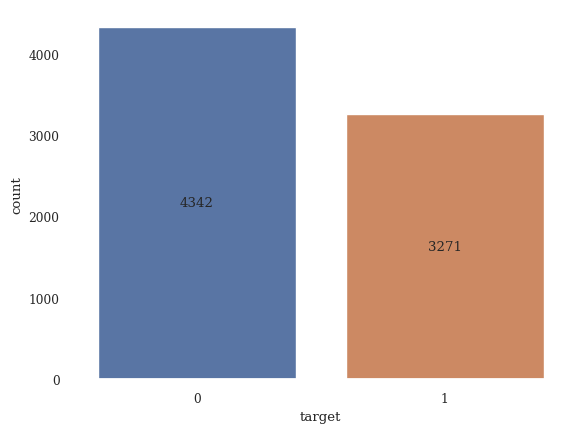

In [5]:
# Check the balance of classes
print('Classes prop.:', df['target'].value_counts()/df['target'].shape[0], sep='\n')
f1 = sns.countplot(df['target'],label="Count")
plt.bar_label(f1.containers[-1], label_type='center', fmt='%.0f')
plt.show()

The full training set in our DataSet is not evenly distributed, with 57% of entries belonging to class "0" and 43% to class "1." To address this imbalance, we will employ the random oversampling method to balance the class distribution.

In [6]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X=df[['text']], y=df[['target']])

Classes prop.:
target
0         0.5
1         0.5
dtype: float64


C:\Users\aleja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



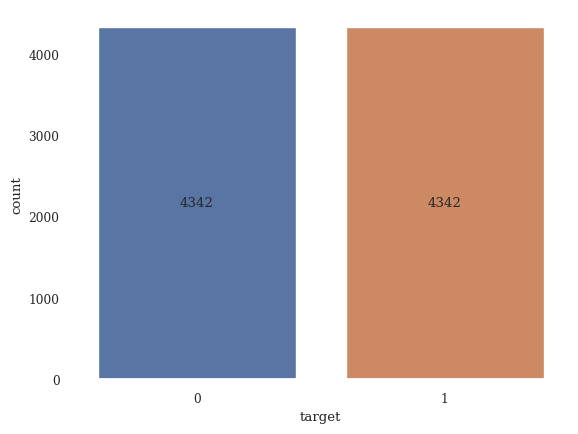

In [7]:
# Check the balance of classes
print('Classes prop.:', y_over.value_counts()/y_over.shape[0], sep='\n')
f2 = sns.countplot(y_over['target'],label="Count")
plt.bar_label(f2.containers[-1], label_type='center', fmt='%.0f')
plt.show()

### Cleaning DataSet
Now that our training dataset is balanced, it's time to perform data cleaning to ensure the quality and reliability of our data for analysis.

In [80]:
# Concatenates two pandas DataFrames, y_over and X_over, along the horizontal axis
df_over = pd.concat([y_over,X_over], axis=1)

df_over.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8684 entries, 0 to 8683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  8684 non-null   int64 
 1   text    8684 non-null   object
dtypes: int64(1), object(1)
memory usage: 135.8+ KB


In [49]:
# Sets pandas options to display all rows and columns in the output
# pd.set_option("display.max_rows", None, "display.max_columns", None)

# Prints the sum of null values in each column of the DataFrame df_over
# print(df_over.isnull().sum())

target    0
text      0
dtype: int64


In [81]:
# Converts all characters to lowercase
df_over = df_over.apply(lambda x: x.astype(str).str.lower())
# df_over

In [82]:
# This tokenizes the text in the 'text' column into words
df_over['words'] = df_over['text'].str.strip().str.split()

# df_over

In [84]:
# There appears to be a pattern in the text: there's a lot of "links". Thus, we are going to delete them all.

# This is the pattern
pattern = 'http://t.co/'
pattern_2 = 'https://t.co/'

# This removes all words in each list that contains the first pattern
df_over['words'] = [[w for w in row if pattern not in w] for row in df_over['words']]
# This removes all words in each list that contains the second pattern
df_over['words'] = [[w for w in row if pattern_2 not in w] for row in df_over['words']]
# df_over

In [85]:
# Load stop words from the NLTK library
stop_words = set(stopwords.words('english'))

# Remove stop words from the text in the DataFrame
df_over['words'] = df_over['words'].apply(lambda x: [w for w in x if w not in stop_words])
# df_over

In [86]:
# Create a regular expression pattern to match punctuation characters
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

# Apply the regular expression pattern to remove punctuation from each text in the DataFrame
df_over['words'] = df_over['words'].apply(lambda x: [re.sub(re_punc, '', w) for w in x])

df_over

,target,text,words
0,1,our deeds are the reason of this #earthquake m...,"[deeds, reason, earthquake, may, allah, forgiv..."
1,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, canada]"
2,1,all residents asked to 'shelter in place' are ...,"[residents, asked, shelter, place, notified, o..."
3,1,"13,000 people receive #wildfires evacuation or...","[13000, people, receive, wildfires, evacuation..."
4,1,just got sent this photo from ruby #alaska as ...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
5,1,#rockyfire update => california hwy. 20 closed...,"[rockyfire, update, , california, hwy, 20, clo..."
6,1,#flood #disaster heavy rain causes flash flood...,"[flood, disaster, heavy, rain, causes, flash, ..."
7,1,i'm on top of the hill and i can see a fire in...,"[im, top, hill, see, fire, woods]"
8,1,there's an emergency evacuation happening now ...,"[theres, emergency, evacuation, happening, bui..."
9,1,i'm afraid that the tornado is coming to our a...,"[im, afraid, tornado, coming, area]"
